### Problem 1

$fun1(x,y) = (x+y)+\sum_{x=1}^{x-1}x$

The test for the equation is given below.

In [38]:
function fun1(x,y)
    if x == 0
        return y
    else
        return fun1(x - 1, x + y)
    end
end
function test1(n_trial)
    for i in 1:n_trial
        x = rand(1:n_trial)
        y = rand(1:n_trial)
        if !((x+y)+sum(1:(x-1)) == fun1(x,y))
            return false
        end
    end
    return true
end
test1(100)


true

### Problem 2

$fun2(a,b) = a^b$

In [40]:
function fun2(a,b)
    if b == 0
        return 1
    elseif b % 2 == 0
        return fun2(a * a, b ÷ 2)
    else
        return fun2(a * a, b ÷ 2) * a
    end
end
function test2(n_trial)
    for i in 1:n_trial
        x = rand(1:n_trial)
        y = rand(1:n_trial)
        if !(x^y == fun2(x,y))
            return false
        end
    end
    return true
end
test1(100)

true

### Problem 3

The outcome is 0 1 2 0 3 0 1 4 0 1 2 0.

In [42]:
function fun3(x)
    if x > 0
        x -= 1
        fun3(x)
        print(x, " ")
        x -= 1
        fun3(x)
    end
end

fun3(5)


0 1 2 0 3 0 1 4 0 1 2 0 

### Problem 4(a)

In [53]:

function mkCmatrix(xmin,xmax,ymin,ymax,nx,ny)
    C =  Complex.(zeros(ny,nx))
    x = collect(range(xmin, stop = xmax, length =nx))
    y = collect(range(ymin, stop = ymax, length = ny))
    for i in 1:ny 
        for j in 1:nx
            C[i,j] = x[j]+y[i]im
        end
    end
    return C
end
C = mkCmatrix(-2.25, 0.75, -1.25, 1.25, 600, 500)
display(C)

500×600 Matrix{ComplexF64}:
 -2.25-1.25im     -2.24499-1.25im     …  0.744992-1.25im     0.75-1.25im
 -2.25-1.24499im  -2.24499-1.24499im     0.744992-1.24499im  0.75-1.24499im
 -2.25-1.23998im  -2.24499-1.23998im     0.744992-1.23998im  0.75-1.23998im
 -2.25-1.23497im  -2.24499-1.23497im     0.744992-1.23497im  0.75-1.23497im
 -2.25-1.22996im  -2.24499-1.22996im     0.744992-1.22996im  0.75-1.22996im
 -2.25-1.22495im  -2.24499-1.22495im  …  0.744992-1.22495im  0.75-1.22495im
 -2.25-1.21994im  -2.24499-1.21994im     0.744992-1.21994im  0.75-1.21994im
 -2.25-1.21493im  -2.24499-1.21493im     0.744992-1.21493im  0.75-1.21493im
 -2.25-1.20992im  -2.24499-1.20992im     0.744992-1.20992im  0.75-1.20992im
 -2.25-1.20491im  -2.24499-1.20491im     0.744992-1.20491im  0.75-1.20491im
 -2.25-1.1999im   -2.24499-1.1999im   …  0.744992-1.1999im   0.75-1.1999im
 -2.25-1.19489im  -2.24499-1.19489im     0.744992-1.19489im  0.75-1.19489im
 -2.25-1.18988im  -2.24499-1.18988im     0.744992-1.18988im  0.7

In [50]:
function mandelbrot_set(C,maxiter)
    numx = size(C,1)
    numy = size(C,2)
    N = zeros(numx,numy)
    for i in 1:numx
        for j in 1:numy
            n = 0
            it = C[i,j]
            while (abs(it) <= 4)&(n < maxiter)
                it = it^2 + C[i,j]
                n += 1
            end
            if n < maxiter
                N[i,j] = n
            else
                n = 0
                N[i,j] = 0
            end
            #println("The number if iteration for (", i, ",", j ,") is ", n)
        end
        #println("finish the",i,"row")
    end
    return N
end

mandelbrot_set (generic function with 1 method)

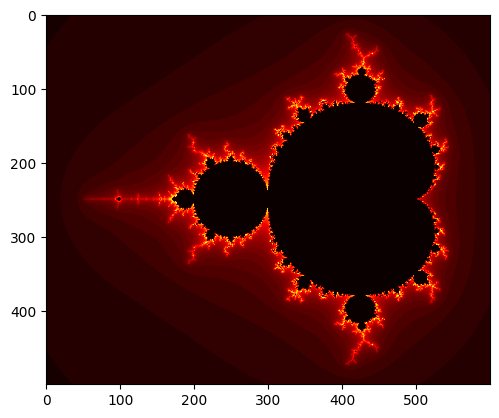

In [52]:
C = mkCmatrix(-2.25, 0.75, -1.25, 1.25, 600, 500)
maxiter = 50
N = mandelbrot_set(C, maxiter)
using PyPlot
imshow(N, cmap=ColorMap("hot"));

### Problem 5a

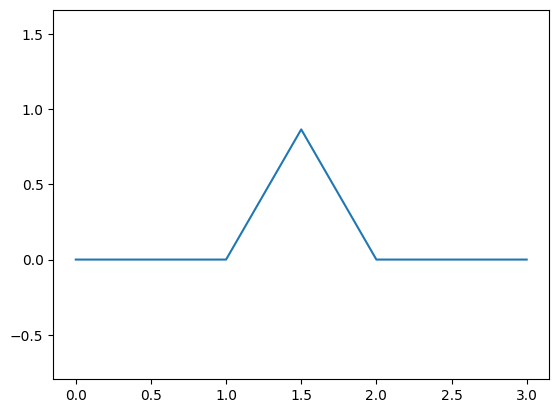

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc5c6ee7400>

In [75]:
using PyPlot
function koch_curve(x1, y1, x2, y2, level)
    x = []
    y = []
    axis("equal")
    if (level == 0)
        append!(x,x1)
        append!(x,x2)
        append!(y,y1)
        append!(y,y2)
        return x,y
    else
        dx = (x2 - x1) / 3
        dy = (y2 - y1) / 3
        x3 = x1 + dx
        y3 = y1 + dy
        x4 = 0.5 * (x1 + x2) + sqrt(3) / 6 * (y1 - y2)
        y4 = 0.5 * (y1 + y2) + sqrt(3) / 6 * (x2 - x1)
        x5 = x1 + 2 * dx
        y5 = y1 + 2 * dy
        # Recursively call koch_curve on the four segments
        x_sub, y_sub = koch_curve(x1, y1, x3, y3, level - 1)
        append!(x, x_sub)
        append!(y, y_sub)
        x_sub, y_sub = koch_curve(x3, y3, x4, y4, level - 1)
        append!(x, x_sub)
        append!(y, y_sub)
        x_sub, y_sub = koch_curve(x4, y4, x5, y5, level - 1)
        append!(x, x_sub)
        append!(y, y_sub)
        x_sub, y_sub = koch_curve(x5, y5, x2, y2, level - 1)
        append!(x, x_sub[2:end])  # Skip the first point to avoid duplication
        append!(y, y_sub[2:end])
        
        return x, y
    end
end
x,y = koch_curve(0,0,3,0,1)
plot(x,y)

### Problem 5b

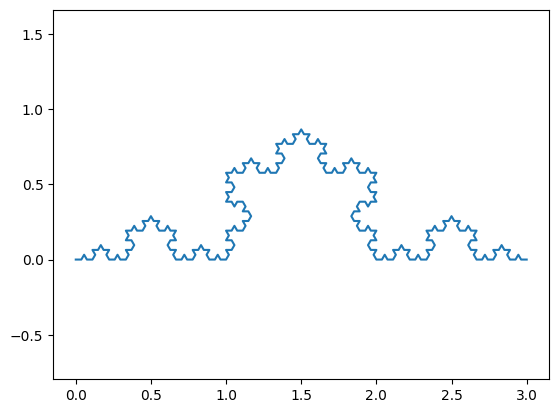

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc5c7079f90>

In [68]:
x,y = koch_curve(0,0,3,0,4)
plot(x,y)

### Problem 5c

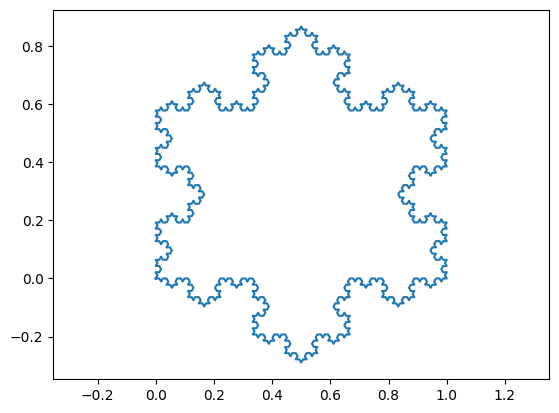

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc5c7011d50>

In [74]:
x_triangle = [0.0, 0.5, 1.0, 0.0]
y_triangle = [0.0, sqrt(3)/2, 0.0, 0.0]
x = []
y = []
for i in 1:3
    x1, y1 = x_triangle[i], y_triangle[i]
    x2, y2 = x_triangle[i+1], y_triangle[i+1]
    x_c, y_c = koch_curve(x1, y1, x2, y2, 4)
    append!(x, x_c)
    append!(y, y_c)
end
plot(x,y)